## Linear advection

$$ \phi_j^{n+1} = \phi_j^{n-1} - c(\phi_{j+1}^n - \phi_{j-1}^n)$$
$$ c = {u {\Delta t \over \Delta x}}$$

The CTCS scheme is conditionally stable with CFL condition
$$ |c| = |u| {\Delta t \over \Delta x} \leq 1$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# function
def funcAdvec(x):
    y = np.zeros(len(x))
    for i in range(0, len(x)):
        if x[i] < 400 or x[i] > 600:
            y[i] = 0
        elif(x[i] < 500):
            y[i] = 2
        else:
            y[i] = 1
    return y

# scheme
def ftfs(y0, c):
    sz = len(y0)
    y1 = np.zeros(sz)
    for i in range(sz-1):
        y1[i] = (1+c)*y0[i] - c*y0[i+1]
    y1[sz-1] = (1+c)*y0[sz-1] - c*y0[0]
    return y1
def ftbs(y0, c):
    sz = len(y0)
    y1 = np.zeros(sz)
    for i in range(sz-1):
        y1[i] = (1-c)*y0[i] + c*y0[i-1]
    return y1
def ctcs(y0, y1, c):
    sz = len(y0)
    y2 = np.zeros(sz)
    for i in range(sz-1):
        y2[i] = y0[i] - c*(y1[i+1] - y1[i-1])
    y2[sz-1] = y0[sz-1] - c*(y1[0] - y1[sz-2])
    return y2

# filter
def RAWfilter(y0, y1, y2, alpha, beta):
    d = alpha*(y0 - 2*y1 + y2)
    return y1 + beta*d, y2 - (beta - 1)*d
def RAfilter(y0, y1, y2, alpha):
    d = alpha*(y0 - 2*y1 + y2)
    return y1 + d, y2

# loop
def run(x0, y0, u, dt, dx, alpha, beta, tinterval, tpoint, filter):
    t = 0
    c = u*dt/dx
    # FTFS x FTBS CFL conditions
    y1 = ftbs(y0, c) if u < 0 else ftbs(y0, c)
    plt.plot(x0, y0, label="$\phi$(" + str(int(np.floor(t))) + "s)")
    while t < tpoint:
        t = t + dt
        y2 = ctcs(y0, y1, c)
        if filter == "RAWfilter":
            y0, y1 = RAWfilter(y0, y1, y2, alpha, beta)
        else: y0, y1 = RAfilter(y0, y1, y2, alpha)
        if t % tinterval < dt:
            plt.plot(x0, y2, label="$\phi$(" + str(int(np.floor(t))) + "s)")

# declare vars
dx = 0.25; dt = 0.1; u = -0.4
tinterval = 500; tpoint = 2000
alpha = 0.05; beta = 0.53
x0 = np.arange(0, 1000, dx)
y0 = funcAdvec(x0)

The solution has two mode: physical mode and computational mode
Apply filter to reduce noise from computational mode

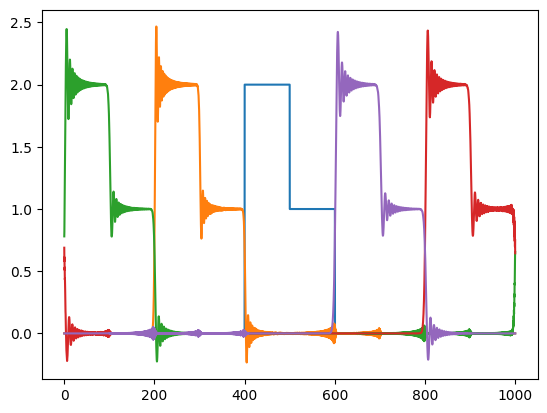

In [4]:
# run
run(x0, y0, u, dt, dx, alpha, beta, tinterval, tpoint, "RAfilter")

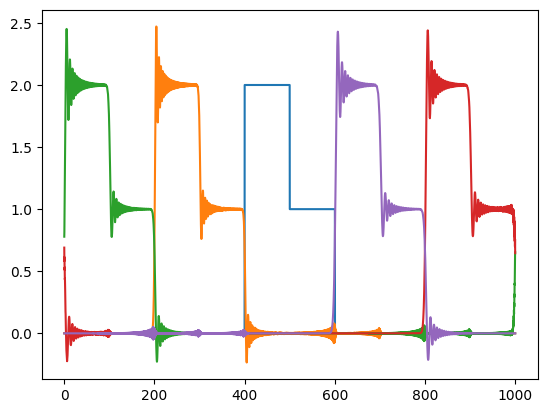

In [5]:
# RAW filter
run(x0, y0, u, dt, dx, alpha, beta, tinterval, tpoint, "RAWfilter")

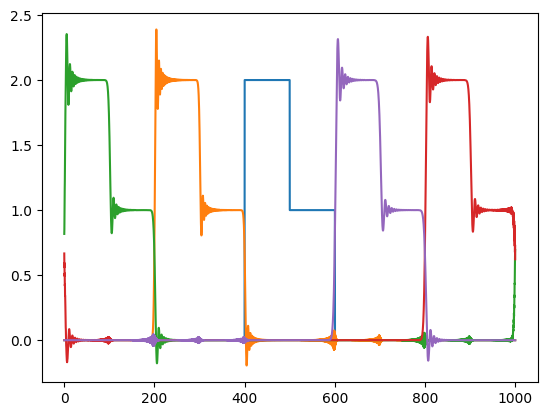

In [6]:
# RA filter
alpha = 0.1; beta = 0.6
run(x0, y0, u, dt, dx, alpha, beta, tinterval, tpoint, "RAfilter")

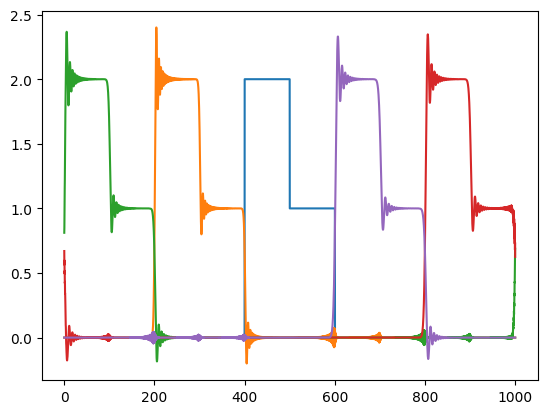

In [7]:
#RAW filter
run(x0, y0, u, dt, dx, alpha, beta, tinterval, tpoint, "RAWfilter")

The computational mode comes from quadratic interpolation
The computational mode oscilates on time and come to opposite direction